# Migrate from Kaggle

In [ ]:
# run every time

!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"georgemagafossis","key":"459357655124f089bc5cc3c9285547a3"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Βήμα 0

In [ ]:
! kaggle datasets download -d geoparslp/patreco3-multitask-affective-music

100% 6.78G/6.78G [02:28<00:00, 49.1MB/s]
100% 6.78G/6.78G [02:29<00:00, 48.8MB/s]


In [ ]:
! mkdir kaggle
! mkdir kaggle/input
! mkdir kaggle/input/patreco3-multitask-affective-music
! unzip patreco3-multitask-affective-music.zip -d kaggle/input/patreco3-multitask-affective-music

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23016.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23060.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23064.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23071.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23072.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23081.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/23082.fused.full.npy  
  inflating: kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrog

In [ ]:
! pwd
! ls

/content
kaggle	kaggle.json  patreco3-multitask-affective-music.zip  sample_data


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/50480.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/42138.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/10119.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/153.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/40797.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/695.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/59915.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/23861.fused.full.npy
./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/test/11529.fused.full.npy
./kaggle/inpu

# Βήμα 1

In [ ]:
data_lab = open('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train_labels.txt', 'r')
print(data_lab.read())

Id	Genre
1042.fused.full.npy.gz	Blues
1043.fused.full.npy.gz	Blues
1044.fused.full.npy.gz	Blues
1045.fused.full.npy.gz	Blues
1047.fused.full.npy.gz	Blues
1048.fused.full.npy.gz	Blues
11957.fused.full.npy.gz	Blues
123943.fused.full.npy.gz	Blues
123944.fused.full.npy.gz	Blues
123945.fused.full.npy.gz	Blues
123947.fused.full.npy.gz	Blues
123949.fused.full.npy.gz	Blues
123950.fused.full.npy.gz	Blues
123951.fused.full.npy.gz	Blues
123952.fused.full.npy.gz	Blues
123955.fused.full.npy.gz	Blues
123960.fused.full.npy.gz	Blues
123961.fused.full.npy.gz	Blues
123963.fused.full.npy.gz	Blues
12787.fused.full.npy.gz	Blues
12790.fused.full.npy.gz	Blues
12792.fused.full.npy.gz	Blues
12796.fused.full.npy.gz	Blues
12803.fused.full.npy.gz	Blues
12884.fused.full.npy.gz	Blues
12901.fused.full.npy.gz	Blues
13193.fused.full.npy.gz	Blues
13671.fused.full.npy.gz	Blues
15510.fused.full.npy.gz	Blues
16023.fused.full.npy.gz	Blues
16304.fused.full.npy.gz	Blues
17559.fused.full.npy.gz	Blues
17695.fused.full.npy.gz	B

In [ ]:
#we chose one Blues file and one Electronic
#Blues : 123947.fused.full.npy.gz
#Electronic : 14780.fused.full.npy.gz

Blues = np.load('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train/123947.fused.full.npy')
Electronic = np.load('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train/14780.fused.full.npy')

In [ ]:
print(Blues.shape) 
print(Electronic.shape) 

(140, 1291)
(140, 1293)


In [ ]:
Blues_mel, Blues_chroma = Blues[:128], Blues[128:]
Electronic_mel, Electronic_chroma = Electronic[:128], Electronic[128:]

In [ ]:
print(Blues_mel.shape, Blues_chroma.shape)
print(Electronic_mel.shape, Electronic_chroma.shape)

(128, 1291) (12, 1291)
(128, 1293) (12, 1293)


[Text(0.5, 1.0, 'Spectrogram')]

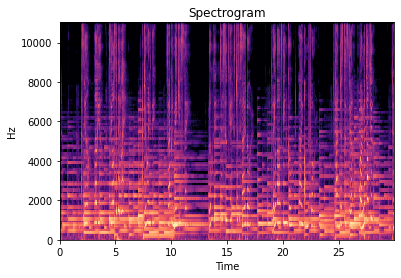

In [ ]:
# Plot the spectrogram and the chromagram
#BLUES

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(Blues_mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'Spectrogram')]

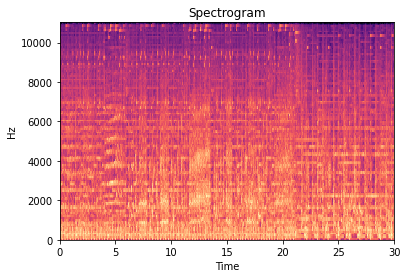

In [ ]:
# Plot the spectrogram and the chromagram
#ELECTRONIC

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(Electronic_mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

Τα spectrograms αποτελούν μια οπτική αναπαράσταση του spectrum των συχνοτήτων ενός σήματος, καθώς αυτό μεταβάλλεται με τον χρόνο. Το χρώμα που παρατηρείται ακολουθεί τις τιμές του πλαινού πίνακα και αναπαριστά το amplitude μιας συγκεκριμένης συχνότητας σε μία συγκεκριμένη χρονική στιγμή. Στις συγκεκριμένες αναπαραστάσεις, παρατηρούμε ότι το πάνω σπεκτρόγραμμα που αναπαριστά ένα κομμάτι blues, έχει πολλές μεταβολές από τις υψηλές συχνότητες στις χαμηλές, αλλά με μια τάση στις χαμηλές συχνότητες. Αντίθετα, στην περίπτωση της ηλεκτρονικής μουσικής, έχουμε χρήση και υψηλότερων συχνοτήτων, καθώς επίσης παρατηρείται και μία συνέχεια.

# Βήμα 2

In [ ]:
print(Blues_mel.shape)
print(Electronic_mel.shape)

(128, 1291)
(128, 1293)


Παρέχεται αναλυτικός σχολιασμός στην αναφορά μας.

In [ ]:
Blues_beat = np.load('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/123947.fused.full.npy')
Electronic_beat = np.load('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train/14780.fused.full.npy')

In [ ]:
Blues_beat_mel, Blues_beat_chroma = Blues_beat[:128], Blues_beat[128:]
Electronic_beat_mel, Electronic_beat_chroma = Electronic_beat[:128], Electronic_beat[128:]

In [ ]:
print(Blues_beat_mel.shape, Blues_beat_chroma.shape)
print(Electronic_beat_mel.shape, Electronic_beat_chroma.shape)

(128, 86) (12, 86)
(128, 63) (12, 63)


Παρατηρούμε ότι οι διαστάσεις πράγματι μειώθηκαν.

[Text(0.5, 1.0, 'Spectrogram')]

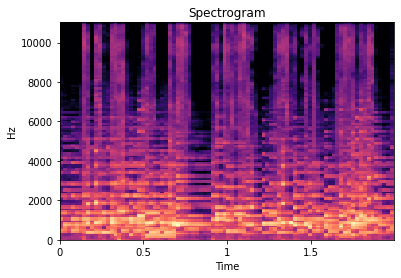

In [ ]:
# Plot the spectrogram and the chromagram
#BLUES

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(Blues_beat_mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'Spectrogram')]

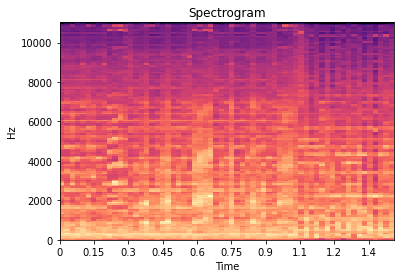

In [ ]:
# Plot the spectrogram and the chromagram
#ELECTRONIC

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(Electronic_beat_mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.f dB")

Φαίνεται να διατηρείται ίδια η μορφή και άρα και η πληροφορία που έχουμε, παρά την μείωση των χρονικών βημάτων. Η μείωση αυτή γίνεται φανερή και πάνω στα spectrograms. 

# Βήμα 3

[Text(0.5, 1.0, 'Chromagram')]

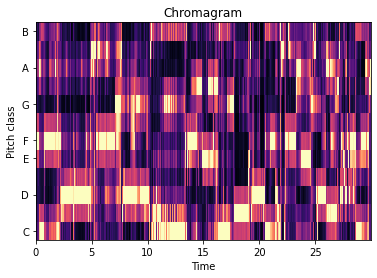

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(Blues_chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
# fig.colorbar(img, ax=ax)

[Text(0.5, 1.0, 'Chromagram')]

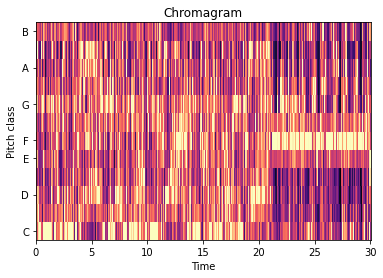

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(Electronic_chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
# fig.colorbar(img, ax=ax)

[Text(0.5, 1.0, 'Chromagram')]

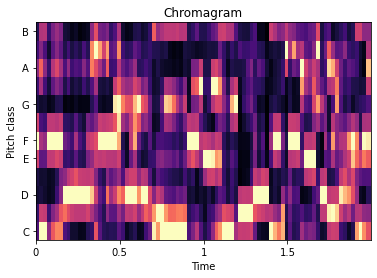

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(Blues_beat_chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
# fig.colorbar(img, ax=ax)

[Text(0.5, 1.0, 'Chromagram')]

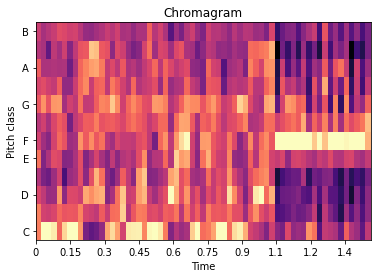

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(Electronic_beat_chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
# fig.colorbar(img, ax=ax)

Παρατηρούμε και εδώ ότι τα beat synchronized αρχεία μας δίνουν παρόμοια εικόνα με τα πρωτότυπα, παρά την μείωση των χρονικών βημάτων. Βλέπουμε ότι απλώς γίνεται πιο "θολή" η εικόνα, διατηρώντας όμως την πληροφορία που μας παρέχεται από τους χρωματισμούς στις αντίστοιχες νότες. Περισσότερη ανάλυση σχετικά με τα χρωμογράμματα υπάρχει στην αναφορά μας.

# Βήμα 4

In [ ]:
# Import the necessary libraries

import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader
import re

# Combine similar classes and remove underrepresented classes
class_mapping = {
    'Rock': 'Rock',
    'Psych-Rock': 'Rock',
    'Indie-Rock': None,
    'Post-Rock': 'Rock',
    'Psych-Folk': 'Folk',
    'Folk': 'Folk',
    'Metal': 'Metal',
    'Punk': 'Metal',
    'Post-Punk': None,
    'Trip-Hop': 'Trip-Hop',
    'Pop': 'Pop',
    'Electronic': 'Electronic',
    'Hip-Hop': 'Hip-Hop',
    'Classical': 'Classical',
    'Blues': 'Blues',
    'Chiptune': 'Electronic',
    'Jazz': 'Jazz',
    'Soundtrack': None,
    'International': None,
    'Old-Time': None
}


# Helper functions to read fused, mel, and chromagram
def read_fused_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)
    return spectrogram.T


def read_mel_spectrogram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[:128]
    return spectrogram.T

    
def read_chromagram(spectrogram_file):
    spectrogram = np.load(spectrogram_file)[128:]
    return spectrogram.T

In [ ]:
import os

# TODO: Comment on how the train and validation splits are created.
# TODO: It's useful to set the seed when debugging but when experimenting ALWAYS set seed=None. Why?
def torch_train_val_split(
        dataset, batch_train, batch_eval,
        val_size=.2, shuffle=True, seed=None):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=batch_eval,
                            sampler=val_sampler)
    return train_loader, val_loader


class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])


# TODO: Comment on why padding is needed
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[:self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1

# Pytorch Dataset Class for creating the dataset
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1, read_spec_fn=read_fused_spectrogram):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spec_fn(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            # Kaggle automatically unzips the npy.gz format so this hack is needed
            _id = l[0].split('.')[0]
            npy_file = '{}.fused.full.npy'.format(_id)
            files.append(npy_file)
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        # TODO: Inspect output and comment on how the output is formatted
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)

In [ ]:
beat_mel_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)
    
train_loader_beat_mel, val_loader_beat_mel = torch_train_val_split(beat_mel_specs, 32 ,32, val_size=.33)
     
ttest_loader_beat_mel = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
         train=False,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)

In [ ]:
beat_chroma = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_chromagram)

train_loader_beat_chroma, val_loader_beat_chroma = torch_train_val_split(beat_chroma, 32 ,32, val_size=.33)

ttest_loader_beat_chroma = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
         train=False,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_chromagram)

In [ ]:
specs_fused = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_fused_spectrogram)

train_loader, val_loader = torch_train_val_split(specs_fused, 32 ,32, val_size=.33)

ttest_loader = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
     train=False,
     class_mapping=class_mapping,
     max_length=-1,
     read_spec_fn=read_fused_spectrogram)

['Chiptune', 'Soundtrack', 'Post-Punk', 'Rock', 'Folk', 'Classical', 'Indie-Rock', 'Old-Time', 'Post-Rock', 'International', 'Pop', 'Punk', 'Jazz', 'Trip-Hop', 'Hip-Hop', 'Blues', 'Psych-Rock', 'Psych-Folk', 'Metal', 'Electronic']
[160, 124, 160, 160, 160, 160, 160, 160, 95, 160, 160, 160, 160, 137, 160, 160, 160, 160, 153, 160]


<BarContainer object of 20 artists>

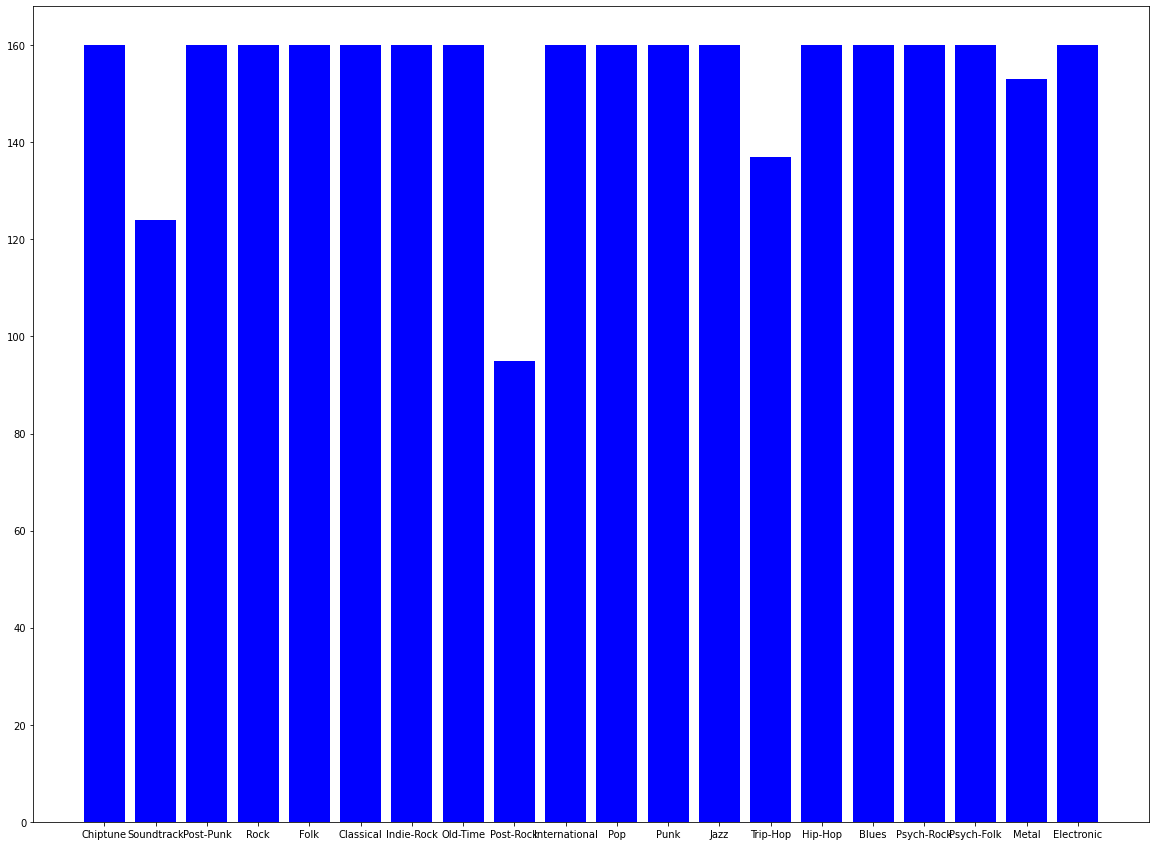

In [ ]:
import matplotlib.pyplot as plt

#we create an histogram before the classes mixing

data_lab = open('./kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train_labels.txt', 'r')
data_lab.readline()
labels_before = []
for line in data_lab:
    labels_before.append(line.split()[1])

unique_labels = list(set(labels_before)) #we save the different kind of music we have
print(unique_labels)

occur = []
for i in range(len(unique_labels)):
    occur.append(labels_before.count(unique_labels[i])) #we find the occurences of every kind in the whole array of labels

print(occur)

fig = plt.figure(figsize = (20,15))
plt.bar(unique_labels,occur,color='blue')

['Folk', 'Classical', 'Pop', 'Trip-Hop', 'Hip-Hop', 'Jazz', 'Rock', 'Blues', 'Metal', 'Electronic']
[320. 160. 160. 137. 160. 160. 415. 160. 313. 320.]


<BarContainer object of 10 artists>

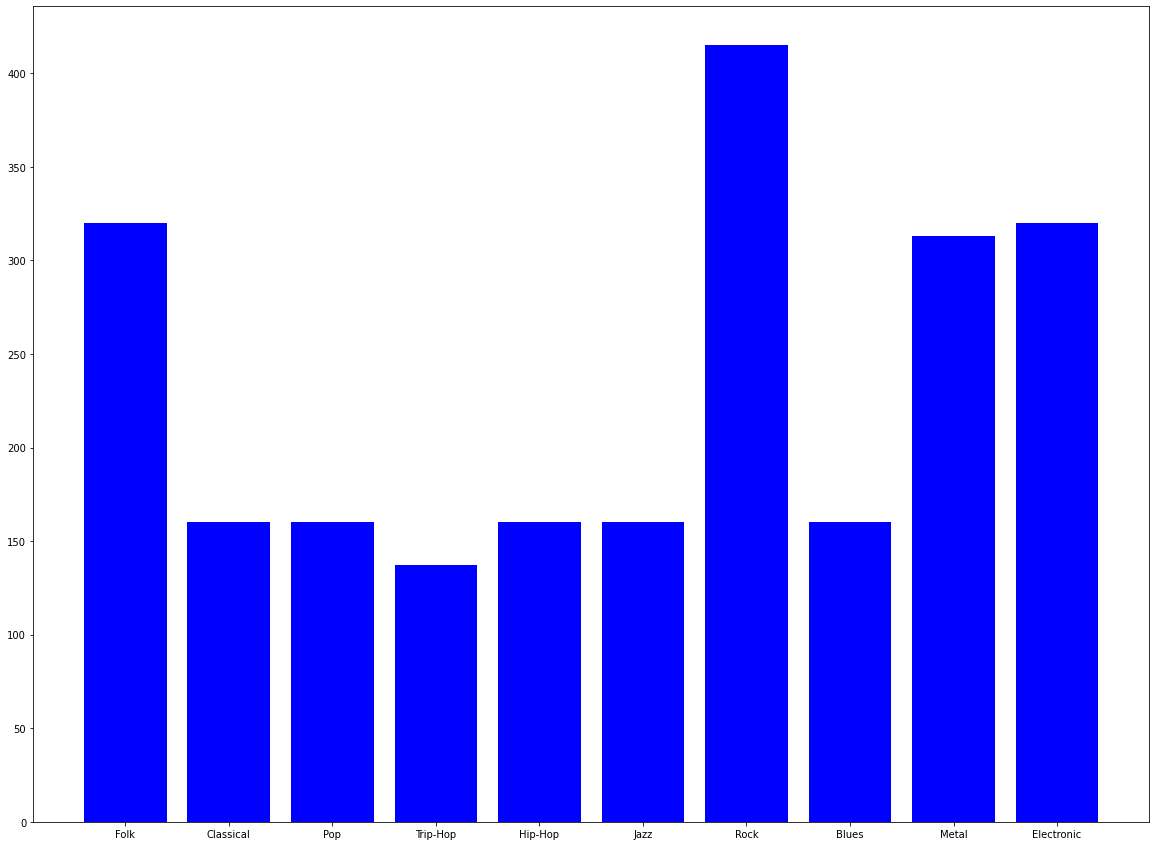

In [ ]:
labels_after = list(set(class_mapping.values()))
labels_after.remove(None)
print(labels_after)

occur_after = np.zeros(len(labels_after))

for kind in class_mapping.keys() :
    #print(class_mapping[kind])
    if(class_mapping[kind]!=None):
        temp = labels_before.count(kind)
        #print(temp)
        index = labels_after.index(class_mapping[kind])
        #print(index)
        occur_after[index] = occur_after[index] + temp

print(occur_after)

fig = plt.figure(figsize = (20,15))
plt.bar(labels_after,occur_after,color='blue')

# Βήμα 5

Αρχικά, φορτώνουμε τον κώδικα του LSTM που υλοποιήσαμε στο προηγούμενο εργαστήριο : 

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn

class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers = 1, bidirectional=False, dropout_probability=0):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.dropout_probability = dropout_probability
        self.rnn_size = rnn_size
        self.lstm = nn.LSTM(input_size=self.input_dim, hidden_size=self.rnn_size, num_layers=self.num_layers,
                            batch_first=True, dropout=self.dropout_probability, bidirectional=self.bidirectional)
        self.linear = nn.Linear(self.feature_size, self.output_dim)
        #self.soft = nn.Softmax(dim=1)


    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index
            lengths: N x 1
         """
        
        # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

        batch_size = len(x)
        seq_len = len(x[0])

        # initialize the hidden state of lstm
        num_of_directions = 1
        if self.bidirectional == True:
          num_of_directions = 2
        hidden = torch.randn(self.num_layers * num_of_directions, batch_size, self.rnn_size).to(device)
        cell_state = torch.randn(self.num_layers * num_of_directions, batch_size, self.rnn_size).to(device)
        #cell_state = init_cell_state(batch_size)

        # pass our data and state to lstm
        outputs, (hidden, cell_state) = self.lstm(x, (hidden, cell_state))

        last_outputs = self.last_timestep(outputs, lengths, self.bidirectional)
        last_outputs = self.linear(last_outputs)
        #last_outputs = self.soft(last_outputs)
        return last_outputs


    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1).to(device)
        return outputs.gather(1, idx).squeeze().to(device)

In [ ]:
def label_to_one_hot(label, number_of_labels):
  code = []
  for i in range(number_of_labels):
    if i == label:
      code.append(1)
    else:
      code.append(0)
  return code

In [ ]:
import torch
from torch import nn as nn
from torch import optim
import joblib

is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
#device = torch.device("cuda")
print(device)

def train_lstm (trainloader, valloader, input_dim, rnn_size, output_dim, num_layers, epochs, mse_loss=True, dropout_probability=0, regularization =0, bidirectional = False, flag=True, checkpoint=False):


  model = BasicLSTM(input_dim=input_dim, rnn_size=rnn_size, output_dim=output_dim,
                  num_layers=num_layers, bidirectional=bidirectional, dropout_probability = dropout_probability) 

  if checkpoint:
    best_model = model
    best_accuracy = 0

  model.to(device)
  if mse_loss:
    loss_function = nn.MSELoss()
  else:
    loss_function = nn.CrossEntropyLoss()
  # define an optimizer with L2 regularization
  optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=regularization) 

  for epoch in range(epochs) :
    train_loss = 0
    val_loss = 0
    counter = 0
    
    for batch in trainloader :
      model.train()
      batch_size = len(batch[0])
      max_seq_len = len(batch[0][0])
      input_tensor = torch.zeros(batch_size, max_seq_len, input_dim)
      le = np.array(batch[2])
      lengths = torch.zeros(batch_size, 1, dtype=torch.int64)
      if mse_loss and flag:
        target_tensor = torch.zeros(batch_size, output_dim)
        t_one_hot = [label_to_one_hot(int(label), output_dim) for label in batch[1]]
      else:
        target_tensor = batch[1].float()
      for i in range(batch_size):
        input_tensor[i]=batch[0][i]
        if mse_loss and flag:
          target_tensor[i] = torch.from_numpy(np.array(t_one_hot[i]))
        lengths[i][0] = le[i]
            

      input_tensor = input_tensor.to(device)
      #target_tensor = target_tensor.to(device)
      lengths = lengths.to(device)
      optimizer.zero_grad()
      out = model(input_tensor, lengths)
      out = out.cpu()
      #print("printing out train")
      #print(out, )
      #for i in range(len(out)):
      #   print("sample = ", i, "out =", out[i], "target = ", target_tensor[i])
      #print(target_tensor)
      #print(out)
      loss = loss_function(out, target_tensor)
      loss.backward()
      optimizer.step()
      train_loss = train_loss + loss.item()
      counter = counter + 1
      #print(counter)

    print("epoch : ", epoch, ",training loss = ", train_loss/counter)

    val_counter = 0
    for val_batch in valloader :
      model.eval()
      val_batch_size = len(val_batch[0])
      max_seq_len = len(val_batch[0][0])
      input_tensor = torch.zeros(val_batch_size, max_seq_len, input_dim)
      le = np.array(val_batch[2])
      lengths = torch.zeros(val_batch_size, 1, dtype=torch.int64)
      if mse_loss and flag:
        target_tensor = torch.zeros(val_batch_size, output_dim)
        t_one_hot = [label_to_one_hot(int(label), output_dim) for label in val_batch[1]]
      else:
        target_tensor = val_batch[1].float()
      for i in range(val_batch_size):
        input_tensor[i]=val_batch[0][i]
        if mse_loss and flag:
          target_tensor[i] = torch.from_numpy(np.array(t_one_hot[i]))
        lengths[i][0] = le[i]
        
      input_tensor = input_tensor.to(device)
      #target_tensor = target_tensor.to(device)
      lengths = lengths.to(device)
      out_val = model(input_tensor, lengths)
      out_val = out_val.cpu()
      #print("printing out_val")
      #print(out_val.cpu())
      loss_val = loss_function(out_val, target_tensor)
      val_loss = val_loss + loss_val.item()
      #accuracy = eval_lstm(model, val_batch[0], val_batch[1], val_batch[2], input_dim, output_dim)
      val_counter += 1
      
    if (flag):
      arr, accuracy = eval_lstm(model, valloader, input_dim, output_dim)
      print("Accuracy in validation set = ", accuracy*100,"%")    
    #print("confusion matrix = ", arr)
    print("epoch : ", epoch, ",validation loss = ", val_loss/(val_counter))

    if checkpoint:
      _, accuracy = eval_lstm(model, valloader, input_dim, output_dim)
      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = copy.deepcopy(model)

  if checkpoint:
    return best_model
  return model

cuda


In [ ]:
from sklearn.metrics import zero_one_loss

# we implement a function for evaluating our lstm model

def eval_lstm(model, loader, input_dim, output_dim):
  
  model.eval()
  y_arr = []
  y_pred = []
  for batch in loader :
    batch_size = len(batch[0])
    max_seq_len = len(batch[0][0])
    input_tensor = torch.zeros(batch_size, max_seq_len, input_dim)
    le = np.array(batch[2])
    lengths = torch.zeros(batch_size, 1, dtype=torch.int64)
    for i in range(batch_size):
      input_tensor[i]= batch[0][i]
      lengths[i][0] = le[i]
  
    temp = np.array(batch[1])
    for i in range(len(temp)):
      y_arr.append(temp[i])
    #y_arr.append()
    #n_categories = len(set(y_arr))
    #print(input_tensor)
    input_tensor = input_tensor.to(device)
    lengths = lengths.to(device)
  
    out = model(input_tensor, lengths)
    out = out.cpu()
    #y_pred = []
    #print(out)
    for i in range(len(out)):
      #print(out[i])
      probabilities = out[i].detach().view(-1).numpy()
      #print(probabilities, np.argmax(probabilities), y_arr[i])
      y_pred.append(np.argmax(probabilities))

  #print("predictions = ", y_pred)
  #print("true values = ", y)
  count_diff = np.zeros((output_dim, output_dim)) #it is for saving the sum of results
  for i in range(len(y_arr)):
    count_diff[y_arr[i], y_pred[i]] += 1 #we increase the counter in the model of the true digit in the place of the predicted digit
  #print(y_arr,y_pred)
  #return count_diff, 1-zero_one_loss(y_arr, y_pred)
  return count_diff,1-zero_one_loss(y_arr, y_pred)

Εκπαιδεύουμε πάνω στο σύνολο εκπαίδευσης των φασματογραφημάτων με σκοπό την πρόβλεψη διαφορετικών κλάσεων μουσικών ειδών

In [ ]:
mel_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)

train_loader1, val_loader1 = torch_train_val_split(mel_specs, 32 ,32, val_size=.33)

ttest_loader1 = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
     train=False,
     class_mapping=class_mapping,
     max_length=-1,
     read_spec_fn=read_mel_spectrogram)

In [ ]:
model5_a = train_lstm (train_loader1, val_loader1, input_dim = 128, rnn_size=128, output_dim=10, num_layers=2, epochs=15, dropout_probability=0, regularization = 0.001, bidirectional = False)

epoch :  0 ,training loss =  0.09357523796509723
Accuracy in validation set =  17.36842105263158 %
epoch :  0 ,validation loss =  0.08927407053609689
epoch :  1 ,training loss =  0.08813612680045926
Accuracy in validation set =  18.42105263157895 %
epoch :  1 ,validation loss =  0.08884292220075925
epoch :  2 ,training loss =  0.08754644831832574
Accuracy in validation set =  19.999999999999996 %
epoch :  2 ,validation loss =  0.08762115488449733
epoch :  3 ,training loss =  0.0863910512048371
Accuracy in validation set =  22.236842105263154 %
epoch :  3 ,validation loss =  0.08680962553868692
epoch :  4 ,training loss =  0.08509667004857745
Accuracy in validation set =  22.368421052631582 %
epoch :  4 ,validation loss =  0.08586647051076095
epoch :  5 ,training loss =  0.08479573349563443
Accuracy in validation set =  21.578947368421055 %
epoch :  5 ,validation loss =  0.08567657383779685
epoch :  6 ,training loss =  0.0842247126357896
Accuracy in validation set =  22.499999999999996 

Εκπαιδεύουμε πάνω στο σύνολο εκπαίδευσης των φασματογραφημάτων beat-synced με σκοπό την πρόβλεψη διαφορετικών κλάσεων μουσικών ειδών

In [ ]:
beat_mel_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)

train_loader2, val_loader2 = torch_train_val_split(beat_mel_specs, 32 ,32, val_size=.33)

ttest_loader2 = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/',
     train=False,
     class_mapping=class_mapping,
     max_length=-1,
     read_spec_fn=read_mel_spectrogram)

In [ ]:
model5_b = train_lstm (train_loader2, val_loader2, input_dim = 128, rnn_size=128, output_dim=10, num_layers=2, mse_loss=True, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False)

epoch :  0 ,training loss =  0.08936779657188727
Accuracy in validation set =  20.13157894736842 %
epoch :  0 ,validation loss =  0.08827554589758317
epoch :  1 ,training loss =  0.08812395969823915
Accuracy in validation set =  20.921052631578952 %
epoch :  1 ,validation loss =  0.08690169484664996
epoch :  2 ,training loss =  0.08695059832261533
Accuracy in validation set =  26.315789473684205 %
epoch :  2 ,validation loss =  0.08577114498863618
epoch :  3 ,training loss =  0.08585006257100981
Accuracy in validation set =  25.789473684210527 %
epoch :  3 ,validation loss =  0.08454171754419804
epoch :  4 ,training loss =  0.08400106004306249
Accuracy in validation set =  28.421052631578945 %
epoch :  4 ,validation loss =  0.0831855967019995
epoch :  5 ,training loss =  0.08308628019021481
Accuracy in validation set =  29.73684210526315 %
epoch :  5 ,validation loss =  0.08202099893242121
epoch :  6 ,training loss =  0.08183894580116077
Accuracy in validation set =  33.94736842105264 

Εκπαιδεύουμε πάνω στο σύνολο εκπαίδευσης των χρωμογραφημάτων με σκοπό την πρόβλεψη διαφορετικών κλάσεων μουσικών ειδών

In [ ]:
chroma_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_chromagram)

train_loader3, val_loader3 = torch_train_val_split(chroma_specs, 32 ,32, val_size=.33)

ttest_loader3 = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
     train=False,
     class_mapping=class_mapping,
     max_length=-1,
     read_spec_fn=read_chromagram)

In [ ]:
model5_c = train_lstm (train_loader3, val_loader3, input_dim = 12, rnn_size=128, output_dim=10, num_layers=2, mse_loss=False, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False)

epoch :  0 ,training loss =  2.299966865656327
Accuracy in validation set =  18.81578947368421 %
epoch :  0 ,validation loss =  2.2976003189881644
epoch :  1 ,training loss =  2.2833302750879403
Accuracy in validation set =  18.81578947368421 %
epoch :  1 ,validation loss =  2.2606093088785806
epoch :  2 ,training loss =  2.2591638467749773
Accuracy in validation set =  18.81578947368421 %
epoch :  2 ,validation loss =  2.2592745820681253
epoch :  3 ,training loss =  2.2584565512988033
Accuracy in validation set =  18.81578947368421 %
epoch :  3 ,validation loss =  2.257890353600184
epoch :  4 ,training loss =  2.2586051395961215
Accuracy in validation set =  18.81578947368421 %
epoch :  4 ,validation loss =  2.258551557858785
epoch :  5 ,training loss =  2.2573157719203403
Accuracy in validation set =  18.81578947368421 %
epoch :  5 ,validation loss =  2.258167843023936
epoch :  6 ,training loss =  2.256175980275991
Accuracy in validation set =  18.81578947368421 %
epoch :  6 ,validat

Εκπαιδεύουμε πάνω στο σύνολο εκπαίδευσης των ενωμένων φασματογραφημάτων και χρωμογραφημάτων με σκοπό την πρόβλεψη διαφορετικών κλάσεων μουσικών ειδών

In [ ]:
fused_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_fused_spectrogram)

train_loader4, val_loader4 = torch_train_val_split(fused_specs, 32 ,32, val_size=.33)

ttest_loader4 = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
     train=False,
     class_mapping=class_mapping,
     max_length=-1,
     read_spec_fn=read_fused_spectrogram)

In [ ]:
model5_d = train_lstm (train_loader4, val_loader4, input_dim =140, rnn_size=128, output_dim=10, num_layers=2, mse_loss=True, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False)

epoch :  0 ,training loss =  0.08947776014707526
Accuracy in validation set =  18.157894736842106 %
epoch :  0 ,validation loss =  0.08866289320091407
epoch :  1 ,training loss =  0.08813690074852534
Accuracy in validation set =  19.605263157894736 %
epoch :  1 ,validation loss =  0.08792229772855838
epoch :  2 ,training loss =  0.08754439697581895
Accuracy in validation set =  20.52631578947368 %
epoch :  2 ,validation loss =  0.08745270843307178
epoch :  3 ,training loss =  0.08703137432434122
Accuracy in validation set =  22.236842105263154 %
epoch :  3 ,validation loss =  0.08672747885187466
epoch :  4 ,training loss =  0.08584869075186398
Accuracy in validation set =  21.842105263157897 %
epoch :  4 ,validation loss =  0.08622921910136938
epoch :  5 ,training loss =  0.08464208078019474
Accuracy in validation set =  25.0 %
epoch :  5 ,validation loss =  0.08477593368540208
epoch :  6 ,training loss =  0.08437908608086254
Accuracy in validation set =  25.526315789473685 %
epoch :  

# Βήμα 6

Περνάμε τώρα στην αξιολόγηση των τεσσάρων προηγούμενων μοντέλων στα εξής δύο test sets:
- fma_genre_spectrograms_beat/test_labels.txt
- fma_genre_spectrograms/test_labels.txt

Για τον σκοπό αυτό τροποποιούμε την συνάρτηση αξιολόγησης του μοντέλου

In [ ]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# we implement a function for evaluating our lstm model on various metrics

def deep_eval_lstm(model, loader, input_dim, output_dim):
  # create tensors
  input_list = []
  y_arr = []
  lengths_list = []
  for test_sequence, label, length in loader :
    input_list.append(test_sequence)
    y_arr.append(label)
    lengths_list.append(length)

  test_set_size = loader.__len__()
  input_tensor = torch.zeros(test_set_size, len(input_list[0]), input_dim)
  lengths = torch.zeros(test_set_size, 1, dtype=torch.int64)
  for i in range(test_set_size):
    input_tensor[i] = torch.from_numpy(input_list[i])
    lengths[i][0] = lengths_list[i]

  model.eval()
  y_pred = []
  
  input_tensor = input_tensor.to(device)
  lengths = lengths.to(device)

  out = model(input_tensor, lengths)
  out = out.cpu()
  for i in range(len(out)):
    probabilities = out[i].detach().view(-1).numpy()
    y_pred.append(np.argmax(probabilities))

  report = classification_report(y_arr, y_pred, list(range(output_dim)))
  print(report)

  return report, y_arr, y_pred

"\n  count_diff = np.zeros((output_dim, output_dim)) #it is for saving the sum of results\n  for i in range(len(y_arr)):\n    count_diff[y_arr[i], y_pred[i]] += 1 #we increase the counter in the model of the true digit in the place of the predicted digit\n\n\n  confusion = count_diff\n  accuracy = 1-zero_one_loss(y_arr, y_pred)\n  precision_class = precision_score(y_arr, y_pred, average=None, zero_division=0)\n  recall_class = recall_score(y_arr, y_pred, average=None)\n  f1_class = f1_score(y_arr, y_pred, average=None)\n  macro_precision = precision_score(y_arr, y_pred, average='macro', zero_division=0)\n  macro_recall = recall_score(y_arr, y_pred, average='macro')\n  macro_f1_class = f1_score(y_arr, y_pred, average='macro')\n  micro_precision = precision_score(y_arr, y_pred, average='micro', zero_division=0)\n  micro_recall = recall_score(y_arr, y_pred, average='micro')\n  micro_f1_class = f1_score(y_arr, y_pred, average='micro')\n\n  metric_dict = {'confusion':confusion,\n           

In [ ]:
report1, _, _ = deep_eval_lstm(model5_a, ttest_loader1, 128, 10)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       1.00      0.03      0.05        40
           2       0.19      0.90      0.32        80
           3       0.20      0.05      0.08        80
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        40
           8       0.32      0.55      0.41       103
           9       0.00      0.00      0.00        34

    accuracy                           0.23       575
   macro avg       0.17      0.15      0.09       575
weighted avg       0.18      0.23      0.13       575



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report2, _, _  = deep_eval_lstm(model5_b, ttest_loader2, 128, 10)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.29      0.72      0.41        40
           2       0.32      0.66      0.43        80
           3       0.32      0.60      0.41        80
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40
           6       0.48      0.26      0.33        78
           7       0.00      0.00      0.00        40
           8       0.31      0.34      0.32       103
           9       0.00      0.00      0.00        34

    accuracy                           0.32       575
   macro avg       0.17      0.26      0.19       575
weighted avg       0.23      0.32      0.25       575



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report3, _, _  = deep_eval_lstm(model5_c, ttest_loader3, 12, 10)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        40
           8       0.18      1.00      0.30       103
           9       0.00      0.00      0.00        34

    accuracy                           0.18       575
   macro avg       0.02      0.10      0.03       575
weighted avg       0.03      0.18      0.05       575



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report4, _, _  = deep_eval_lstm(model5_d, ttest_loader4, 140, 10)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.30      0.60      0.40        40
           2       0.28      0.74      0.41        80
           3       0.37      0.24      0.29        80
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        40
           6       0.36      0.55      0.43        78
           7       0.00      0.00      0.00        40
           8       0.27      0.30      0.29       103
           9       0.00      0.00      0.00        34

    accuracy                           0.31       575
   macro avg       0.16      0.24      0.18       575
weighted avg       0.21      0.31      0.23       575



# Βήμα 7

In [ ]:
mel_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)

train_loader1, val_loader1 = torch_train_val_split(mel_specs, 32 ,32, val_size=.33)

for data in train_loader1:
    t = (data)
    break

batch_size = len(t[0])
sequence_size = len(t[0][0])
feature_size = len(t[0][0][0])
output_size = 10
print("batch size: ", batch_size)
print("sequence size: ", sequence_size)
print("feature size: ", feature_size)
print("output size: ", output_size)

ttest_loader1 = SpectrogramDataset(
     './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
     train=False,
     class_mapping=class_mapping,
     max_length=sequence_size,
     read_spec_fn=read_mel_spectrogram)

batch size:  32
sequence size:  1293
feature size:  128
output size:  10


In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Device: ", device)

Device:  cuda


In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import math

class BasicCNN(nn.Module):
    def __init__(self, image_x, image_y, output_dim):
        super(BasicCNN, self).__init__()
        kernel_size = [3, 3, 3, 3]
        pool_size = [2, 2, 2, 2]
        self.image_x = image_x
        self.image_y = image_y

        self.model1 = nn.Sequential(
          nn.Conv2d(in_channels=1, out_channels=16, kernel_size=kernel_size[0]),
          nn.BatchNorm2d(num_features=16),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=pool_size[0])
        )
        out1_image_x = math.floor((((image_x  - (kernel_size[0] - 1)) - (pool_size[0] - 1) - 1) / 2) + 1)
        out1_image_y = math.floor((((image_y  - (kernel_size[0] - 1)) - (pool_size[0] - 1) - 1) / 2) + 1)
        
        self.model2 = nn.Sequential(
          nn.Conv2d(16,32,kernel_size[1]),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(pool_size[1])
        )
        out2_image_x = math.floor((((out1_image_x  - (kernel_size[1] - 1)) - (pool_size[1] - 1) - 1) / 2) + 1)
        out2_image_y = math.floor((((out1_image_y  - (kernel_size[1] - 1)) - (pool_size[1] - 1) - 1) / 2) + 1)
        
        self.model3 = nn.Sequential(
          nn.Conv2d(32,64,kernel_size[2]),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(pool_size[2])
        )
        out3_image_x = math.floor((((out2_image_x  - (kernel_size[2] - 1)) - (pool_size[2] - 1) - 1) / 2) + 1)
        out3_image_y = math.floor((((out2_image_y  - (kernel_size[2] - 1)) - (pool_size[2] - 1) - 1) / 2) + 1)

        self.model4 = nn.Sequential(
          nn.Conv2d(64,128,kernel_size[3]),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(pool_size[3])
        )
        out4_image_x = math.floor((((out3_image_x  - (kernel_size[3] - 1)) - (pool_size[3] - 1) - 1) / 2) + 1)
        out4_image_y = math.floor((((out3_image_y  - (kernel_size[3] - 1)) - (pool_size[3] - 1) - 1) / 2) + 1)

        self.final_x = int(out4_image_x)
        self.final_y = int(out4_image_y)
        self.final_features = 128 * self.final_x * self.final_y

        self.linear = nn.Linear(in_features=self.final_features, out_features=output_dim)

    def forward(self, x):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index
            lengths: N x 1
         """
        output1 = self.model1(x)
        # print(output1.shape)
        output2 = self.model2(output1)
        # print(output2.shape)
        output3 = self.model3(output2)
        # print(output3.shape)
        final_layer = self.model4(output3)

        flattened = torch.flatten(final_layer, start_dim=1)
        # print(flattened.shape)
        linear_out = self.linear(flattened)
        # print(linear_out.shape)
        
        return linear_out

In [ ]:
from sklearn.metrics import zero_one_loss

# we implement a function for evaluating our CNN model on validation
def validation(model, loader, input_dim, output_dim):
  y_arr = []
  y_pred = []
  
  for batch, labels, _ in loader:
    y_arr = y_arr + [element.item() for element in labels]
    # create tensor
    input_tensor = batch.float().unsqueeze_(1).to(device)
      
    # make predictions on device
    model.eval()
    out = model(input_tensor)
    out = out.cpu()
    for i in range(len(out)):
      probabilities = out[i].detach().view(-1).numpy()
      y_pred.append(np.argmax(probabilities))

  # create confusion matrix and accuracy
  count_diff = np.zeros((output_dim, output_dim))
  for i in range(len(y_arr)):
    count_diff[y_arr[i], y_pred[i]] += 1
  # return the results
  return count_diff,1-zero_one_loss(y_arr, y_pred)

In [ ]:
from torch import optim

# define our cnn model
ourCNN = BasicCNN(sequence_size, feature_size, output_size)
ourCNN.to(device)
# set a loss function
loss_function = nn.CrossEntropyLoss()
# define an optimizer with L2 regularization
optimizer = optim.Adam(ourCNN.parameters(), lr=0.0001, weight_decay=0.001) 

epochs = 25
for epoch in range(epochs):
  train_loss = 0
  counter = 0
  ourCNN.train()
  for input, labels,_ in train_loader1:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels
    optimizer.zero_grad()
    out = ourCNN(input_tensor)
    out = out.cpu()
    loss = loss_function(out, target_tensor)
    loss.backward()
    optimizer.step()
    train_loss = train_loss + loss.item()
    counter = counter + 1

  print("epoch : ", epoch, ",training loss = ", train_loss/counter)

  _, val_accuracy = validation(ourCNN, val_loader1, feature_size, output_size)
  print("Accuracy in validation set = ", val_accuracy*100,"%")

epoch :  0 ,training loss =  2.322191997450225
Accuracy in validation set =  36.44736842105263 %
epoch :  1 ,training loss =  1.5035201019170332
Accuracy in validation set =  33.157894736842096 %
epoch :  2 ,training loss =  1.1349664403467763
Accuracy in validation set =  30.78947368421052 %
epoch :  3 ,training loss =  0.8392163332627744
Accuracy in validation set =  37.5 %
epoch :  4 ,training loss =  0.4912762654070951
Accuracy in validation set =  37.36842105263158 %
epoch :  5 ,training loss =  0.33280697890690397
Accuracy in validation set =  41.05263157894736 %
epoch :  6 ,training loss =  0.23151969727204771
Accuracy in validation set =  45.39473684210527 %
epoch :  7 ,training loss =  0.20587552779791307
Accuracy in validation set =  45.78947368421053 %
epoch :  8 ,training loss =  0.12027399667671748
Accuracy in validation set =  45.526315789473685 %
epoch :  9 ,training loss =  0.10920248013369892
Accuracy in validation set =  45.78947368421053 %
epoch :  10 ,training loss 

In [ ]:
from sklearn.metrics import zero_one_loss

# we implement a function for evaluating our CNN model on various metrics
def eval_cnn(model, loader, input_dim, output_dim):
  y_arr = []
  y_pred = []
  input_list = []
  
  for input_id in range(loader.__len__()):
    batch_size = 32

    # create tensors
    test_sequence, label, _ = loader.__getitem__(input_id)
    input_list.append(test_sequence)
    y_arr.append(label)

    if len(input_list)  == batch_size or input_id == (loader.__len__() - 1):
      input_tensor = torch.zeros(len(input_list), 1, len(input_list[0]), input_dim)
      for i in range(len(input_list)):
        input_tensor[i][0] = torch.from_numpy(input_list[i])
      
      # make predictions on device
      model.eval()
      input_tensor = input_tensor.to(device)
      out = model(input_tensor)
      out = out.cpu()
      for i in range(len(out)):
        probabilities = out[i].detach().view(-1).numpy()
        y_pred.append(np.argmax(probabilities))
      input_list = []

  # create confusion matrix and accuracy
  count_diff = np.zeros((output_dim, output_dim))
  for i in range(len(y_arr)):
    count_diff[y_arr[i], y_pred[i]] += 1
  # return the results
  return count_diff,1-zero_one_loss(y_arr, y_pred)

In [ ]:
eval_cnn(ourCNN, ttest_loader1, 128, 10)

(array([[ 3.,  1.,  0., 12.,  5.,  4.,  4.,  2.,  8.,  1.],
        [ 0., 24.,  5.,  6.,  0.,  3.,  1.,  0.,  0.,  1.],
        [ 0.,  2., 50.,  5.,  2.,  4.,  5.,  3.,  4.,  5.],
        [ 4.,  5.,  2., 48.,  2.,  1.,  4.,  2., 12.,  0.],
        [ 0.,  2.,  5.,  1., 16.,  0.,  1.,  0.,  6.,  9.],
        [ 1., 10.,  5.,  4.,  2.,  7.,  2.,  1.,  3.,  5.],
        [ 0.,  4.,  5.,  2.,  0.,  0., 52.,  1., 11.,  3.],
        [ 0.,  0.,  3., 14.,  2.,  1.,  4.,  2., 11.,  3.],
        [ 0.,  4., 11., 14.,  2.,  4., 28.,  3., 35.,  2.],
        [ 0.,  0.,  6.,  2.,  1.,  1.,  1.,  0.,  5., 18.]]),
 0.4434782608695652)

# Βήμα 8

In [ ]:
data_lab = open('./kaggle/input/patreco3-multitask-affective-music/data/multitask_dataset/train_labels.txt', 'r')
print(data_lab.read())

Id,valence,energy,danceability
5823,0.578,0.973,0.873
6276,0.839,0.782,0.655
9505,0.587,0.956,0.204
5042,0.222,0.226,0.189
6073,0.576,0.842,0.869
2021,0.595,0.769,0.801
3361,0.557,0.964,0.571
8133,0.364,0.63,0.345
9811,0.89,0.442,0.63
1755,0.716,0.514,0.592
8424,0.699,0.949,0.522
8421,0.188,0.689,0.547
7737,0.902,0.605,0.591
6807,0.866,0.633,0.646
1866,0.743,0.212,0.465
3979,0.779,0.798,0.807
3932,0.0702,0.552,0.485
8112,0.355,0.984,0.364
2864,0.858,0.638,0.834
7209,0.0859,0.216,0.266
2935,0.759,0.665,0.95
7892,0.795,0.387,0.631
6355,0.561,0.585,0.621
3318,0.173,0.832,0.792
7134,0.784,0.806,0.47
6201,0.454,0.622,0.467
2065,0.821,0.661,0.854
4734,0.29,0.182,0.25
8854,0.561,0.961,0.403
8228,0.561,0.772,0.582
2717,0.911,0.72,0.845
2044,0.846,0.825,0.819
7531,0.854,0.677,0.483
7014,0.541,0.908,0.472
8190,0.257,0.727,0.555
1553,0.723,0.557,0.423
8578,0.491,0.712,0.29
5861,0.848,0.824,0.798
5524,0.0687,0.0975,0.0906
8045,0.836,0.87,0.514
8705,0.252,0.948,0.335
8046,0.815,0.882,0.495
2094,0.7

In [ ]:
class MultitaskDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1, read_spec_fn=read_fused_spectrogram, target=1):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping, target)
        self.feats = [read_spec_fn(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        #self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('float')
        # print(self.labels)

    def get_files_labels(self, txt, class_mapping, target):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            l = l[0].split(',')
            #print(l)
            if target == -1: # take all
              label = l[1:]
            else:
              label = l[target]
            # print(label)
            if class_mapping:
                label = class_mapping[label]
            if not label:
                continue
            # Kaggle automatically unzips the npy.gz format so this hack is needed
            _id = l[0].split('.')[0]
            npy_file = '{}.fused.full.npy'.format(_id)
            files.append(npy_file)
            labels.append(label)
        #print(labels)
        return files, labels

    def __getitem__(self, item):
        # TODO: Inspect output and comment on how the output is formatted
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)

In [ ]:
valence = MultitaskDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/multitask_dataset_beat/',
         train=True,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram,
         target = 1) #valence = 1, energy = 2, danceability = 3

In [ ]:
def torch_train_val_test_split(
        dataset, batch_train, batch_eval, batch_test,
        val_size=.2, test_size = .2, shuffle=True, seed=None):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    test_split = int(np.floor(test_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split+test_split:]
    val_indices = indices[:val_split]
    test_indices = indices[val_split:test_split+val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=batch_eval,
                            sampler=val_sampler)
    test_loader = DataLoader(dataset,
                            batch_size=batch_test,
                            sampler=test_sampler)
    return train_loader, val_loader, test_loader


In [ ]:
train_loader_valence, val_loader_valence, test_loader_valence = torch_train_val_test_split(valence, 32 ,32, 32, val_size=.2, test_size=.2)

In [ ]:
print(test_loader_valence.__len__())
print(train_loader_valence.__len__())
print(val_loader_valence.__len__())

7
22
7


In [ ]:
model_valence = train_lstm (train_loader_valence, val_loader_valence, input_dim = 128, rnn_size=128, output_dim=1, num_layers=2, mse_loss=True, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False, flag=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  0 ,training loss =  0.1485870030115951
epoch :  0 ,validation loss =  0.06654710056526321
epoch :  1 ,training loss =  0.07143332267349417
epoch :  1 ,validation loss =  0.06640007080776351
epoch :  2 ,training loss =  0.06650444069369273
epoch :  2 ,validation loss =  0.06479750520416669
epoch :  3 ,training loss =  0.06869294358925386
epoch :  3 ,validation loss =  0.06525066973907608
epoch :  4 ,training loss =  0.06805968640202825
epoch :  4 ,validation loss =  0.06475942262581416
epoch :  5 ,training loss =  0.06562553430822762
epoch :  5 ,validation loss =  0.06601510143705777
epoch :  6 ,training loss =  0.06614029255102981
epoch :  6 ,validation loss =  0.06502687877842359
epoch :  7 ,training loss =  0.0653492437506264
epoch :  7 ,validation loss =  0.0651736498943397
epoch :  8 ,training loss =  0.06933779404921965
epoch :  8 ,validation loss =  0.06466272579772132
epoch :  9 ,training loss =  0.06542549248446118
epoch :  9 ,validation loss =  0.065296221524477
epoch

In [ ]:
energy = MultitaskDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/multitask_dataset_beat/',
         train=True,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram,
         target = 2) #valence = 1, energy = 2, danceability = 3

In [ ]:
train_loader_energy, val_loader_energy, test_loader_energy = torch_train_val_test_split(energy, 32 ,32, 32, val_size=.2, test_size=.2)

In [ ]:
model_energy = train_lstm (train_loader_energy, val_loader_energy, input_dim = 128, rnn_size=128, output_dim=1, num_layers=2, mse_loss=True, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False, flag=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  0 ,training loss =  0.11493013274263252
epoch :  0 ,validation loss =  0.08036307990550995
epoch :  1 ,training loss =  0.07298359037800269
epoch :  1 ,validation loss =  0.06700168283922332
epoch :  2 ,training loss =  0.06565985100513155
epoch :  2 ,validation loss =  0.06713560596108437
epoch :  3 ,training loss =  0.06534635961394418
epoch :  3 ,validation loss =  0.06660985467689377
epoch :  4 ,training loss =  0.06730341487987475
epoch :  4 ,validation loss =  0.0670383907854557
epoch :  5 ,training loss =  0.070839640091766
epoch :  5 ,validation loss =  0.06659511689628873
epoch :  6 ,training loss =  0.0682972613722086
epoch :  6 ,validation loss =  0.06689725071191788
epoch :  7 ,training loss =  0.06627874279564078
epoch :  7 ,validation loss =  0.06658808354820524
epoch :  8 ,training loss =  0.06467481063340198
epoch :  8 ,validation loss =  0.06727755442261696
epoch :  9 ,training loss =  0.06667064926163717
epoch :  9 ,validation loss =  0.06670022170458521
epoc

In [ ]:
danceability = MultitaskDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/multitask_dataset_beat/',
         train=True,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram,
         target = 3) #valence = 1, energy = 2, danceability = 3

In [ ]:
train_loader_danceability, val_loader_danceability, test_loader_danceability = torch_train_val_test_split(danceability, 32 ,32, 32, val_size=.2, test_size=.2)

In [ ]:
model_danceability = train_lstm (train_loader_danceability, val_loader_danceability, input_dim = 128, rnn_size=128, output_dim=1, num_layers=2, mse_loss=True, epochs=15, dropout_probability=0, regularization = 0, bidirectional = False, flag=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch :  0 ,training loss =  0.15884227187118746
epoch :  0 ,validation loss =  0.02945337550980704
epoch :  1 ,training loss =  0.03610380578108809
epoch :  1 ,validation loss =  0.029254933819174767
epoch :  2 ,training loss =  0.03311689689078114
epoch :  2 ,validation loss =  0.029334627890161107
epoch :  3 ,training loss =  0.031819385645741764
epoch :  3 ,validation loss =  0.028999279120138714
epoch :  4 ,training loss =  0.03178639074956829
epoch :  4 ,validation loss =  0.028730266594461033
epoch :  5 ,training loss =  0.0339926601472226
epoch :  5 ,validation loss =  0.028851472373519624
epoch :  6 ,training loss =  0.03313510289246386
epoch :  6 ,validation loss =  0.02854219318500587
epoch :  7 ,training loss =  0.03178759977560152
epoch :  7 ,validation loss =  0.028518148564866612
epoch :  8 ,training loss =  0.031059888953512364
epoch :  8 ,validation loss =  0.028921772592834065
epoch :  9 ,training loss =  0.03061633244876496
epoch :  9 ,validation loss =  0.0291864196

In [ ]:
from sklearn.metrics import zero_one_loss

# we implement a function for evaluating our lstm model

def eval_pred(model, loader, input_dim, output_dim):
  
 
  y_arr = []
  y_pred = []
  for batch in loader :
    batch_size = len(batch[0])
    max_seq_len = len(batch[0][0])
    input_tensor = torch.zeros(batch_size, max_seq_len, input_dim)
    le = np.array(batch[2])
    lengths = torch.zeros(batch_size, 1, dtype=torch.int64)
    for i in range(batch_size):
      input_tensor[i]= batch[0][i]
      lengths[i][0] = le[i]
  
    temp = np.array(batch[1])
    for i in range(len(temp)):
      y_arr.append(temp[i])
    #y_arr.append()
    #n_categories = len(set(y_arr))
    #print(input_tensor)
    input_tensor = input_tensor.to(device)
    lengths = lengths.to(device)
   
    model.eval()
    out = model(input_tensor, lengths)
    out = out.cpu()
    #print(out)

    for i in range(len(out)):
      pred = out[i].detach().view(-1).numpy()
      # print(pred)
      y_pred.append(pred)

  #print(len(y_arr))
  #print(len(y_pred))
  return y_arr, y_pred

In [ ]:
from scipy import stats

labels_valence, predictions_valence = eval_pred(model_valence, test_loader_valence, 128, 1)
#print(predictions_valence)
spearman_valence, _ = stats.spearmanr(labels_valence, predictions_valence)
labels_energy, predictions_energy = eval_pred(model_energy, test_loader_energy, 128, 1)
spearman_energy, _ = stats.spearmanr(labels_energy, predictions_energy)
labels_danceability, predictions_danceability = eval_pred(model_danceability, test_loader_danceability, 128, 1)
spearman_danceability, _ = stats.spearmanr(labels_danceability, predictions_danceability)

print("The Spearman correlation between the ground true values and the predicted values for valence is ", spearman_valence)
print("The Spearman correlation between the ground true values and the predicted values for energy is ", spearman_energy)
print("The Spearman correlation between the ground true values and the predicted values for danceability is ", spearman_danceability)

print("The Mean Spearman correlation between the ground true values and the predicted values is ", ((abs(spearman_valence) + abs(spearman_energy) + abs(spearman_danceability))/3)*100, "%")
#print(predictions_valence[1])

The Spearman correlation between the ground true values and the predicted values for valence is  0.012364502171831717
The Spearman correlation between the ground true values and the predicted values for energy is  0.16034465501623185
The Spearman correlation between the ground true values and the predicted values for danceability is  0.210778828662883
The Mean Spearman correlation between the ground true values and the predicted values is  12.782932861698217 %


Προσαργμογή του CNN μοντέλου

In [ ]:
batch_size = None
sequence_size = None
feature_size = None

for input, labels, length in train_loader_valence: #, val_loader_valence, test_loader_valence
  batch_size = len(input)
  sequence_size = len(input[0])
  feature_size = len(input[0][0])
  break
  
output_size = 1
print("batch size: ", batch_size)
print("sequence size: ", sequence_size)
print("feature size: ", feature_size)
print("output size: ", output_size)

batch size:  32
sequence size:  104
feature size:  128
output size:  1


In [ ]:
from torch import optim

def train_cnn(model, train_loader, val_loader):
  model.to(device)
  # set a loss function for regression
  loss_function = nn.MSELoss()
  # define an optimizer with L2 regularization
  optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001) 

  epochs = 50
  for epoch in range(epochs):
    train_loss = 0
    counter = 0
    model.train()
    for input, labels,_ in train_loader:
      # print(input.float().unsqueeze_(1).shape)
      input_tensor = input.float().unsqueeze_(1).to(device)
      target_tensor = labels.float()
      optimizer.zero_grad()
      out = model(input_tensor)
      out = out.cpu().flatten()
      loss = loss_function(out, target_tensor)
      loss.backward()
      optimizer.step()
      train_loss = train_loss + loss.item()
      counter = counter + 1

    if epoch % 5 == 0:
      print("epoch : ", epoch, ",training loss = ", train_loss/counter)


    val_loss = 0
    val_counter = 0
    model.eval()
    for input, labels,_ in val_loader:
      # print(input.float().unsqueeze_(1).shape)
      input_tensor = input.float().unsqueeze_(1).to(device)
      target_tensor = labels.float()
      out = model(input_tensor)
      out = out.cpu().flatten()
      #print(out)
      loss = loss_function(out, target_tensor)
      val_loss = val_loss + loss.item()
      val_counter = val_counter + 1

    if epoch % 5 == 0:
      print("epoch : ", epoch, ",validation loss = ", val_loss/val_counter)
  return model

In [ ]:
non_trained = BasicCNN(sequence_size, feature_size, output_size)
valence_CNN = train_cnn(non_trained, train_loader_valence, val_loader_valence)

epoch :  0 ,training loss =  0.28241137821565976
epoch :  0 ,validation loss =  0.17545177893979208
epoch :  5 ,training loss =  0.04782540190287612
epoch :  5 ,validation loss =  0.09729160581316267
epoch :  10 ,training loss =  0.02826998954300176
epoch :  10 ,validation loss =  0.09476154031498092
epoch :  15 ,training loss =  0.015480867333032867
epoch :  15 ,validation loss =  0.09497664549521037
epoch :  20 ,training loss =  0.019156079929829997
epoch :  20 ,validation loss =  0.08485651016235352
epoch :  25 ,training loss =  0.008010165956379338
epoch :  25 ,validation loss =  0.09010611474514008
epoch :  30 ,training loss =  0.004691568489017134
epoch :  30 ,validation loss =  0.08899326462830816
epoch :  35 ,training loss =  0.004483387678522955
epoch :  35 ,validation loss =  0.0877743379345962
epoch :  40 ,training loss =  0.008432487967762758
epoch :  40 ,validation loss =  0.08988524547645024
epoch :  45 ,training loss =  0.003336557631634853
epoch :  45 ,validation loss =

In [ ]:
non_trained = BasicCNN(sequence_size, feature_size, output_size)
energy_CNN = train_cnn(non_trained, train_loader_energy, val_loader_energy)

epoch :  0 ,training loss =  0.11576225066726858
epoch :  0 ,validation loss =  0.08477152564695903
epoch :  5 ,validation loss =  0.07245108378784997
epoch :  10 ,training loss =  0.01318331450139257
epoch :  10 ,validation loss =  0.06764077820948192
epoch :  15 ,validation loss =  0.07070745155215263
epoch :  20 ,training loss =  0.010992686295966532
epoch :  20 ,validation loss =  0.0663531172488417
epoch :  25 ,validation loss =  0.0589728264936379
epoch :  30 ,training loss =  0.026432085972787303
epoch :  30 ,validation loss =  0.07090062754494804
epoch :  35 ,validation loss =  0.056242216378450394
epoch :  40 ,training loss =  0.005740945566106926
epoch :  40 ,validation loss =  0.048934080238853185
epoch :  45 ,validation loss =  0.05166240941200938


In [ ]:
non_trained = BasicCNN(sequence_size, feature_size, output_size)
danceability_CNN = train_cnn(non_trained, train_loader_danceability, val_loader_danceability)

epoch :  0 ,training loss =  0.17688481797548858
epoch :  0 ,validation loss =  0.061201839574745724
epoch :  5 ,validation loss =  0.05549345697675433
epoch :  10 ,training loss =  0.014680726030333475
epoch :  10 ,validation loss =  0.07347660139203072
epoch :  15 ,validation loss =  0.06200924675379481
epoch :  20 ,training loss =  0.016622815556316214
epoch :  20 ,validation loss =  0.07774682555879865
epoch :  25 ,validation loss =  0.04691955713289125
epoch :  30 ,training loss =  0.003946127105419609
epoch :  30 ,validation loss =  0.05182740278542042
epoch :  35 ,validation loss =  0.05018974840641022
epoch :  40 ,training loss =  0.00801420637766238
epoch :  40 ,validation loss =  0.04619627179844039
epoch :  45 ,validation loss =  0.048456271312066486


In [ ]:
from sklearn.metrics import zero_one_loss

# we implement a function for getting our CNN model predictions
def cnn_pred(model, loader):
  y_arr = []
  y_pred = []
  
  for batch, labels, _ in loader:
    y_arr = y_arr + [element.item() for element in labels]
    # create tensor
    input_tensor = batch.float().unsqueeze_(1).to(device)
      
    # make predictions on device
    model.eval()
    out = model(input_tensor)
    out = out.cpu().flatten()
    for i in range(len(out)):
      pred = out[i].detach().view(-1).numpy()
      # print(pred)
      y_pred.append(pred)

  
  # return the results
  return y_arr, y_pred

In [ ]:
from scipy import stats

labels_valence, predictions_valence = cnn_pred(valence_CNN, test_loader_valence)
print(predictions_valence)
spearman_valence, _ = stats.spearmanr(labels_valence, predictions_valence)
labels_energy, predictions_energy = cnn_pred(energy_CNN, test_loader_energy)
spearman_energy, _ = stats.spearmanr(labels_energy, predictions_energy)
labels_danceability, predictions_danceability = cnn_pred(danceability_CNN, test_loader_danceability)
spearman_danceability, _ = stats.spearmanr(labels_danceability, predictions_danceability)

print("The Spearman correlation between the ground true values and the predicted values for valence is ", spearman_valence)
print("The Spearman correlation between the ground true values and the predicted values for energy is ", spearman_energy)
print("The Spearman correlation between the ground true values and the predicted values for danceability is ", spearman_danceability)

print("The Mean Spearman correlation between the ground true values and the predicted values is ", ((abs(spearman_valence) + abs(spearman_energy) + abs(spearman_danceability))/3)*100, "%")
# print(predictions_valence)

[array([0.40917453], dtype=float32), array([0.24733712], dtype=float32), array([0.7439803], dtype=float32), array([0.6771036], dtype=float32), array([0.1808013], dtype=float32), array([0.41223103], dtype=float32), array([0.7258171], dtype=float32), array([0.672772], dtype=float32), array([0.5830934], dtype=float32), array([0.9412342], dtype=float32), array([0.8464996], dtype=float32), array([0.5622257], dtype=float32), array([0.6304387], dtype=float32), array([0.6300557], dtype=float32), array([0.6033948], dtype=float32), array([0.8484658], dtype=float32), array([-0.07997783], dtype=float32), array([0.3448153], dtype=float32), array([0.23820548], dtype=float32), array([0.5165072], dtype=float32), array([0.73547333], dtype=float32), array([0.48752096], dtype=float32), array([0.76698565], dtype=float32), array([0.6077396], dtype=float32), array([0.3650305], dtype=float32), array([0.50639004], dtype=float32), array([0.8508514], dtype=float32), array([0.37968144], dtype=float32), array([0.

# Βήμα 9α

Επιλέγουμε το cnn μοντέλο καθώς είχε την υψηλότερη ακρίβεια

In [ ]:
mel_specs = SpectrogramDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/',
         train=True,
         class_mapping=class_mapping,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram)

train_loader1, val_loader1 = torch_train_val_split(mel_specs, 32 ,32, val_size=.33)

In [ ]:
for data in train_loader1:
    t = (data)
    break

batch_size = len(t[0])
sequence_size = len(t[0][0])
feature_size = len(t[0][0][0])
output_size = 10
print("batch size: ", batch_size)
print("sequence size: ", sequence_size)
print("feature size: ", feature_size)
print("output size: ", output_size)

batch size:  32
sequence size:  1293
feature size:  128
output size:  10


In [ ]:
from torch import optim

# define our cnn model
cnn_on_genre = BasicCNN(sequence_size, feature_size, output_size)
# keep checkpoint
best_cnn_on_genre = BasicCNN(sequence_size, feature_size, output_size)
best_accuracy = 0
cnn_on_genre.to(device)
# set a loss function
loss_function = nn.CrossEntropyLoss()
# define an optimizer with L2 regularization
optimizer = optim.Adam(cnn_on_genre.parameters(), lr=0.0001, weight_decay=0.001) 

epochs = 25
for epoch in range(epochs):
  train_loss = 0
  counter = 0
  cnn_on_genre.train()
  for input, labels,_ in train_loader1:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels
    optimizer.zero_grad()
    out = cnn_on_genre(input_tensor)
    out = out.cpu()
    loss = loss_function(out, target_tensor)
    loss.backward()
    optimizer.step()
    train_loss = train_loss + loss.item()
    counter = counter + 1

  print("epoch : ", epoch, ",training loss = ", train_loss/counter)

  _, val_accuracy = validation(cnn_on_genre, val_loader1, feature_size, output_size)
  print("Accuracy in validation set = ", val_accuracy*100,"%")

  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_cnn_on_genre = copy.deepcopy(cnn_on_genre)

epoch :  0 ,training loss =  2.3794826439448764
Accuracy in validation set =  36.31578947368421 %
epoch :  1 ,training loss =  1.617509515918031
Accuracy in validation set =  33.55263157894737 %
epoch :  2 ,training loss =  1.2348788246816518
Accuracy in validation set =  35.0 %
epoch :  3 ,training loss =  0.8115654149833991
Accuracy in validation set =  34.078947368421055 %
epoch :  4 ,training loss =  0.5825166915144239
Accuracy in validation set =  39.21052631578947 %
epoch :  5 ,training loss =  0.37180917299523647
Accuracy in validation set =  35.65789473684211 %
epoch :  6 ,training loss =  0.2557648590632847
Accuracy in validation set =  41.31578947368422 %
epoch :  7 ,training loss =  0.177902631613673
Accuracy in validation set =  37.89473684210527 %
epoch :  8 ,training loss =  0.13908079114495492
Accuracy in validation set =  41.05263157894736 %
epoch :  9 ,training loss =  0.09832225975637533
Accuracy in validation set =  41.18421052631579 %
epoch :  10 ,training loss =  0

In [ ]:
eval_cnn(best_cnn_on_genre, ttest_loader1, 128, 10)

(array([[ 4.,  0.,  1., 17.,  1.,  2.,  4.,  0., 10.,  1.],
        [ 0., 22.,  4.,  7.,  0.,  4.,  1.,  0.,  2.,  0.],
        [ 0.,  1., 51.,  5.,  6.,  2.,  5.,  1.,  7.,  2.],
        [ 1.,  5.,  0., 55.,  2.,  2.,  3.,  0., 12.,  0.],
        [ 0.,  1.,  8.,  3., 20.,  1.,  0.,  0.,  5.,  2.],
        [ 1.,  9.,  9.,  9.,  1.,  3.,  1.,  0.,  4.,  3.],
        [ 0.,  2.,  6.,  3.,  0.,  0., 43.,  1., 23.,  0.],
        [ 2.,  0.,  4., 15.,  2.,  1.,  0.,  2., 14.,  0.],
        [ 0.,  1.,  5., 13.,  1.,  3., 29.,  2., 48.,  1.],
        [ 0.,  0., 14.,  8.,  1.,  1.,  1.,  0.,  5.,  4.]]),
 0.43826086956521737)

In [ ]:
batch_size = None
sequence_size = None
feature_size = None

for input, labels, length in train_loader_valence: #, val_loader_valence, test_loader_valence
  batch_size = len(input)
  sequence_size = len(input[0])
  feature_size = len(input[0][0])
  break
  
output_size = 1
print("batch size: ", batch_size)
print("sequence size: ", sequence_size)
print("feature size: ", feature_size)
print("output size: ", output_size)

# get the parameters from the trained on genre dataset and setting them to the new model
transfered_cnn = BasicCNN(sequence_size, feature_size, output_size) 
for model_param, trained_param in zip(transfered_cnn.parameters(), best_cnn_on_genre.parameters()):
  if model_param.size() == trained_param.size():
    print(model_param.size(), trained_param.size())
    model_param.data = trained_param.data

batch size:  32
sequence size:  104
feature size:  128
output size:  1
torch.Size([16, 1, 3, 3]) torch.Size([16, 1, 3, 3])
torch.Size([16]) torch.Size([16])
torch.Size([16]) torch.Size([16])
torch.Size([16]) torch.Size([16])
torch.Size([32, 16, 3, 3]) torch.Size([32, 16, 3, 3])
torch.Size([32]) torch.Size([32])
torch.Size([32]) torch.Size([32])
torch.Size([32]) torch.Size([32])
torch.Size([64, 32, 3, 3]) torch.Size([64, 32, 3, 3])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([128, 64, 3, 3]) torch.Size([128, 64, 3, 3])
torch.Size([128]) torch.Size([128])
torch.Size([128]) torch.Size([128])
torch.Size([128]) torch.Size([128])


In [ ]:
transfered_cnn.to(device)
# set a loss function for regression
loss_function = nn.MSELoss()
# define an optimizer with L2 regularization
optimizer = optim.Adam(transfered_cnn.parameters(), lr=0.0001, weight_decay=0.001) 

epochs = 10
for epoch in range(epochs):
  train_loss = 0
  counter = 0
  transfered_cnn.train()
  for input, labels,_ in train_loader_valence:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels.float()
    optimizer.zero_grad()
    out = transfered_cnn(input_tensor)
    out = out.cpu().flatten()
    loss = loss_function(out, target_tensor)
    loss.backward()
    optimizer.step()
    train_loss = train_loss + loss.item()
    counter = counter + 1

  print("epoch : ", epoch, ",training loss = ", train_loss/counter)


  val_loss = 0
  val_counter = 0
  transfered_cnn.eval()
  for input, labels,_ in val_loader_valence:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels.float()
    out = transfered_cnn(input_tensor)
    out = out.cpu().flatten()
    #print(out)
    loss = loss_function(out, target_tensor)
    val_loss = val_loss + loss.item()
    val_counter = val_counter + 1

  print("epoch : ", epoch, ",validation loss = ", val_loss/val_counter)

epoch :  0 ,training loss =  0.1478214135224169
epoch :  0 ,validation loss =  0.19842975054468429
epoch :  1 ,training loss =  0.06939574720507319
epoch :  1 ,validation loss =  0.07216924535376686
epoch :  2 ,training loss =  0.05262090037153526
epoch :  2 ,validation loss =  0.0850745460816792
epoch :  3 ,training loss =  0.0472526355561885
epoch :  3 ,validation loss =  0.0852866390986102
epoch :  4 ,training loss =  0.050435670566829766
epoch :  4 ,validation loss =  0.08369494176336698
epoch :  5 ,training loss =  0.03762472641061653
epoch :  5 ,validation loss =  0.07681218800800187
epoch :  6 ,training loss =  0.03632977681065148
epoch :  6 ,validation loss =  0.07444819488695689
epoch :  7 ,training loss =  0.03432422292164781
epoch :  7 ,validation loss =  0.07787303679755755
epoch :  8 ,training loss =  0.033181146887893025
epoch :  8 ,validation loss =  0.07315106210964066
epoch :  9 ,training loss =  0.02938474735922434
epoch :  9 ,validation loss =  0.08274818531104497


In [ ]:
from scipy import stats

labels_valence, predictions_valence = cnn_pred(transfered_cnn, test_loader_valence)
spearman_valence, _ = stats.spearmanr(labels_valence, predictions_valence)
# labels_energy, predictions_energy = cnn_pred(transfered_cnn, test_loader_energy)
# spearman_energy, _ = stats.spearmanr(labels_energy, predictions_energy)
# labels_danceability, predictions_danceability = cnn_pred(transfered_cnn, test_loader_danceability)
# spearman_danceability, _ = stats.spearmanr(labels_danceability, predictions_danceability)


print("The Spearman correlation between the ground true values and the predicted values for valence is ", spearman_valence)
# print("The Spearman correlation between the ground true values and the predicted values for energy is ", spearman_energy)
# print("The Spearman correlation between the ground true values and the predicted values for danceability is ", spearman_danceability)


The Spearman correlation between the ground true values and the predicted values for valence is  0.4294233743431847


# Βήμα 9β

In [ ]:
multitask_dataset = MultitaskDataset(
         './kaggle/input/patreco3-multitask-affective-music/data/multitask_dataset/',
         train=True,
         max_length=-1,
         read_spec_fn=read_mel_spectrogram,
         target = -1) #valence = 1, energy = 2, danceability = 3 all_toghether = -1

In [ ]:
train_loader, val_loader, test_loader = torch_train_val_test_split(multitask_dataset, 32 ,32, 32, val_size=.2, test_size=.2)

In [ ]:
print("Train dataset length: {}".format(train_loader.__len__()))
print("Validation dataset length: {}".format(val_loader.__len__()))
print("Test dataset length: {}".format(test_loader.__len__()))
print("-------------------")
batch_size = None
sequence_size = None
feature_size = None
output_size = None

for input, labels, length in train_loader: #, val_loader, test_loader
  batch_size = len(input)
  sequence_size = len(input[0])
  feature_size = len(input[0][0])
  output_size = len(labels[0])
  break
  
print("batch size: ", batch_size)
print("sequence size: ", sequence_size)
print("feature size: ", feature_size)
print("output size: ", output_size)

Train dataset length: 22
Validation dataset length: 7
Test dataset length: 7
-------------------
batch size:  32
sequence size:  1293
feature size:  128
output size:  3


In [ ]:
from torch import optim

multi_model = BasicCNN(image_x=sequence_size, image_y=feature_size, output_dim=output_size)
multi_model.to(device)

# set a loss function for each task
weights = [0.33, 0.33, 0.33]
valence_loss_function = nn.MSELoss()
energy_loss_function = nn.MSELoss()
danceability_loss_function = nn.MSELoss()

# define an optimizer with L2 regularization
optimizer = optim.Adam(multi_model.parameters(), lr=0.0001, weight_decay=0.001) 

epochs = 50
for epoch in range(epochs):
  train_loss = 0
  avg_valence_loss = 0
  avg_energy_loss = 0
  avg_danceability_loss = 0
  counter = 0
  multi_model.train()
  for input, labels,_ in train_loader:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels.float()
    optimizer.zero_grad()
    out = multi_model(input_tensor)
    out = out.cpu()
    valence_loss = valence_loss_function(out[:, 0], target_tensor[:, 0])
    energy_loss = energy_loss_function(out[:, 1], target_tensor[:, 1])
    danceability_loss = danceability_loss_function(out[:, 2], target_tensor[:, 2])
    loss = weights[0]*valence_loss + weights[1]*energy_loss + weights[2]*danceability_loss
    loss.backward()
    optimizer.step()
    train_loss = train_loss + loss.item()
    avg_valence_loss = avg_valence_loss + valence_loss.item()
    avg_energy_loss = avg_energy_loss + energy_loss.item()
    avg_danceability_loss = avg_danceability_loss + danceability_loss.item()
    counter = counter + 1

  if epoch % 5 == 0:
    print("Epoch: ", epoch)
    print("Training")
    print("valence_loss: {}, energy_loss: {}, danceability_loss: {}".format(avg_valence_loss/counter, avg_energy_loss/counter, avg_danceability_loss/counter))
    print("Total training loss = ", train_loss/counter)

  val_loss = 0
  val_avg_valence_loss = 0
  val_avg_energy_loss = 0
  val_avg_danceability_loss = 0
  val_counter = 0
  multi_model.eval()
  for input, labels,_ in val_loader:
    # print(input.float().unsqueeze_(1).shape)
    input_tensor = input.float().unsqueeze_(1).to(device)
    target_tensor = labels.float()
    out = multi_model(input_tensor)
    out = out.cpu()
    #print(out)
    valence_loss = valence_loss_function(out[:, 0], target_tensor[:, 0])
    energy_loss = energy_loss_function(out[:, 1], target_tensor[:, 1])
    danceability_loss = danceability_loss_function(out[:, 2], target_tensor[:, 2])
    loss = weights[0]*valence_loss + weights[1]*energy_loss + weights[2]*danceability_loss
    val_loss = val_loss + loss.item()
    val_avg_valence_loss = val_avg_valence_loss + valence_loss.item()
    val_avg_energy_loss = val_avg_energy_loss + energy_loss.item()
    val_avg_danceability_loss = val_avg_danceability_loss + danceability_loss.item()
    val_counter = val_counter + 1

  if epoch % 5 == 0:
    print("Validation")
    print("valence_loss: {}, energy_loss: {}, danceability_loss: {}".format(val_avg_valence_loss/val_counter, val_avg_energy_loss/val_counter, val_avg_danceability_loss/val_counter))
    print("Total validation loss = ", val_loss/val_counter)

Epoch:  0
Training
valence_loss: 2.5908724760467354, energy_loss: 3.4761291315609757, danceability_loss: 2.3947780525142495
Total training loss =  2.79238737848672
Validation
valence_loss: 0.16190234358821595, energy_loss: 0.20052284853799002, danceability_loss: 0.05069834499486855
Total validation loss =  0.13633077485220774
Epoch:  5
Training
valence_loss: 0.12066578678786755, energy_loss: 0.05945925787091255, danceability_loss: 0.041595006425103005
Total training loss =  0.07316761938008395
Validation
valence_loss: 0.10598519657339368, energy_loss: 0.09260144404002599, danceability_loss: 0.08717685458915574
Total validation loss =  0.09430195604051862
Epoch:  10
Training
valence_loss: 0.056876372630623256, energy_loss: 0.02690119749273766, danceability_loss: 0.023712781554257326
Total training loss =  0.035471817732534626
Validation
valence_loss: 0.10236443845289094, energy_loss: 0.09051733144692012, danceability_loss: 0.10554284176656178
Total validation loss =  0.09848012562308993

In [ ]:
# Get our multi task trained model to predict on test dataset

y_arr = []
y_pred = []
 
for batch, labels, _ in test_loader:
  y_arr = y_arr + [label.numpy() for label in labels]
  # create tensor
  input_tensor = batch.float().unsqueeze_(1).to(device)
    
  # make predictions on device
  multi_model.eval()
  out = multi_model(input_tensor)
  out = out.cpu()
  for i in range(len(out)):
    pred = out[i].detach().view(-1).numpy()
    y_pred.append(pred)

print("Ground truth", y_arr)
print("Predictions", y_pred)

Ground truth [array([0.758, 0.65 , 0.664]), array([0.639, 0.605, 0.621]), array([0.656, 0.615, 0.795]), array([0.122, 0.991, 0.143]), array([0.448, 0.622, 0.859]), array([0.699, 0.388, 0.566]), array([0.0393, 0.464 , 0.124 ]), array([0.421, 0.3  , 0.197]), array([0.245, 0.93 , 0.648]), array([0.462, 0.717, 0.62 ]), array([0.756, 0.443, 0.52 ]), array([0.629, 0.853, 0.605]), array([0.734, 0.947, 0.397]), array([0.664, 0.967, 0.537]), array([0.669, 0.35 , 0.685]), array([0.719, 0.844, 0.427]), array([0.557, 0.835, 0.315]), array([0.0748, 0.662 , 0.656 ]), array([0.965, 0.718, 0.764]), array([0.535, 0.607, 0.386]), array([0.751 , 0.0884, 0.66  ]), array([0.759, 0.665, 0.95 ]), array([0.711, 0.589, 0.346]), array([0.834, 0.631, 0.538]), array([0.478, 0.643, 0.746]), array([0.874, 0.86 , 0.624]), array([0.421, 0.976, 0.512]), array([0.0732, 0.85  , 0.47  ]), array([0.731, 0.341, 0.428]), array([0.797, 0.689, 0.638]), array([0.587, 0.956, 0.204]), array([0.716, 0.51 , 0.633]), array([0.745, 

In [ ]:
from scipy import stats

valence_ground = [y[0] for y in y_arr]
energy_ground = [y[1] for y in y_arr]
danceability_ground = [y[2] for y in y_arr]

valence_pred = [pred[0] for pred in y_pred]
energy_pred = [pred[1] for pred in y_pred]
danceability_pred = [pred[2] for pred in y_pred]


valence_spearman, _ = stats.spearmanr(valence_ground, valence_pred)
energy_spearman, _ = stats.spearmanr(energy_ground, energy_pred)
danceability_spearman, _ = stats.spearmanr(danceability_ground, danceability_pred)

print("The Spearman correlation between the ground true values and the predicted values for valence is\n", valence_spearman)
print("The Spearman correlation between the ground true values and the predicted values for energy is\n", energy_spearman)
print("The Spearman correlation between the ground true values and the predicted values for danceability is\n", danceability_spearman)

The Spearman correlation between the ground true values and the predicted values for valence is
 0.1741903900675711
The Spearman correlation between the ground true values and the predicted values for energy is
 0.5485611146083195
The Spearman correlation between the ground true values and the predicted values for danceability is
 0.3660426744978142
